# Projet NLP : Sentiment Analysis

# Binome 

Ounissa ACHIR       
Chaimae RAMDANI

In [78]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
#from keras.layers import Input, Embedding, LSTM, Dense
#from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ordi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Chargement des données 

In [79]:
try:
        data_training = pd.read_csv("twitter_training2.csv", encoding='ISO-8859-1')
        data_test = pd.read_csv("twitter_validation.csv", encoding='ISO-8859-1')
except UnicodeDecodeError:
        print("Error: Unable to decode using specified encoding. Trying different encodings...")
        another_encodings = ['utf-8', 'CP1252']
        for ant_encoding in another_encodings:
            try:
                data_training = pd.read_csv("twitter_training2.csv", encoding=ant_encoding)
                data_test = pd.read_csv("twitter_validation.csv", encoding=ant_encoding)
                print(f"Success! File decoded using {ant_encoding} encoding.")
            except UnicodeDecodeError:
                print(f"Failed to decode using {ant_encoding} encoding.")
        print("Error: Unable to decode file using any of the tried encodings.")

In [80]:
data_training.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [81]:
data_training

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
61116,9200,Nvidia,Positive,Just realized that the Windows partition of my...
61117,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
61118,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
61119,9200,Nvidia,Positive,Just realized between the windows partition of...


In [82]:
data_training.columns.tolist()

['Tweet_ID', 'Topic', 'Sentiment', 'Tweet']

In [83]:
data_training['Tweet'].head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Tweet, dtype: object

In [84]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61121 entries, 0 to 61120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   61121 non-null  int64 
 1   Topic      61121 non-null  object
 2   Sentiment  61121 non-null  object
 3   Tweet      61121 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [85]:
target_df = data_training['Sentiment'].value_counts().reset_index()

In [86]:
target_df

,index,Sentiment
0,Negative,22358
1,Positive,20655
2,Neutral,18108


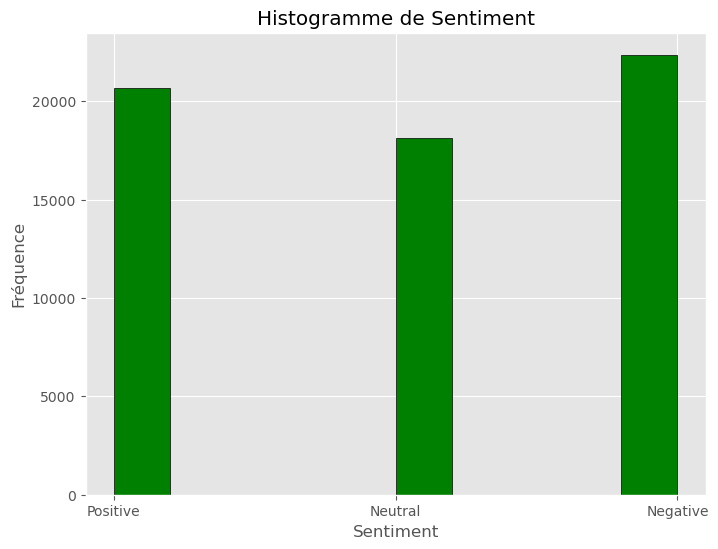

In [87]:
column_to_plot = 'Sentiment'  
colors = ['green', 'red', 'blue']
# Tracer l'histogramme pour la colonne Sentiment
plt.figure(figsize=(8, 6))
plt.hist(data_training[column_to_plot], bins=10, color='green', edgecolor='black')  
plt.title(f'Histogramme de {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [88]:
values = data_training['Sentiment'].value_counts().values
names = data_training['Sentiment'].value_counts().index
title = 'Distribution cible'
# Tracer le diagramme circulaire
fig = px.pie(target_df, values=values, names=names, title=title)
fig.show()


In [89]:
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [90]:
STOPWORDS = set(stopwords_list)
data_training['Tweet'] = data_training['Tweet'].str.lower()
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [91]:
avat_cleanStpW = data_training['Tweet'].iloc[8]
data_training['Tweet'] = data_training['Tweet'].apply(lambda text: cleaning_stopwords(text))

In [92]:
data_training['Tweet'].iloc[8]
print("Avant Cleaning Stop words",avat_cleanStpW)
print("Aprés Cleaning Stop Words",data_training['Tweet'].iloc[8])

Avant Cleaning Stop words so i spent a few hours doing something for fun... if you don't know i'm a huge @ borderlands fan and maya is one of my favorite characters.
Aprés Cleaning Stop Words spent hours something fun... know i'm huge @ borderlands fan maya one favorite characters.


# Pré traitement des données 

In [93]:
def preprocessing(text, enable_stemming=True):
    # Remove HTML tags
    text = re.sub('<[^<>]+>', '', text)
    # Normalize URLs and email addresses
    text = re.sub('(http|https)://[^\s]*', '', text)
    text = re.sub('\S+@\S+', '', text)
    # Normalize numbers and dollar signs
    text = re.sub('\d+', '', text)
    text = re.sub('\$', '', text)

    # Handle contractions
    contractions = {"\'ve": " have", "can\'t": " cannot", "n\'t": " not",
                    "\'re": " are", "\'d": " would", "\'ll": " will",
                    "\'s": "", "\'m": " am", "don\'t": " do not"}
    for contraction, replacement in contractions.items():
        text = text.replace(contraction, replacement)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Stem words
    if enable_stemming:
        stemmer = PorterStemmer()
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        text = ' '.join(stemmed_words)

    return text


In [94]:
tweet_avant = data_training['Tweet'].iloc[10]  
print("Avant prétraitement:")
print(tweet_avant)

data_training['Tweet'] = data_training['Tweet'].apply(preprocessing)

tweet_apres = preprocessing(tweet_avant)
print("\nAprès prétraitement:")
print(tweet_apres)



Avant prétraitement:
2010 spent hours making something fun. . . know huge rhandlerr fan maya one favorite characters. decided make wallpaper pc. . original image versus creation made :) enjoy! pic.twitter.com/mlsi5wf9jg

Après prétraitement:
spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pictwittercommlsiwfjg


In [95]:
from nltk.tokenize import RegexpTokenizer
data_training['Tweet'] = data_training['Tweet'].astype(str)

tokenizer = RegexpTokenizer(r'\w+')
data_training['Tweet'] = data_training['Tweet'].apply(tokenizer.tokenize)


In [96]:
data_training['Tweet'].head()

0          [im, get, borderland, murder]
1              [come, border, kill, all]
2       [im, get, borderland, kill, all]
3    [im, come, borderland, murder, all]
4     [im, get, borderland, murder, all]
Name: Tweet, dtype: object

In [97]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatization(words) :
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

data_training['Tweet'] = data_training['Tweet'].apply(lambda x:lemmatization(x))   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ordi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ordi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [98]:
data_training['Tweet'].head()

0          [im, get, borderland, murder]
1              [come, border, kill, all]
2       [im, get, borderland, kill, all]
3    [im, come, borderland, murder, all]
4     [im, get, borderland, murder, all]
Name: Tweet, dtype: object

In [99]:
import pandas as pd
import nltk
import plotly.express as px

def show_wfreq_plot(df, labelDescr=""):
    if "Tweet" not in df.columns:
        raise ValueError("La colonne 'Tweet' n'est pas présente dans le DataFrame")

    content = df["Tweet"].values
    word_tok = [word for tweet in content for word in tweet]
    freq_dist = nltk.FreqDist(word_tok)

    # Sélectionner les 20 mots les plus fréquents
    ls_freq = [(word, frequency) for word, frequency in freq_dist.most_common(20)]
    twdf = pd.DataFrame(ls_freq, columns=["Word", "Frequency"])
    tfig = px.bar(twdf, x="Word", y="Frequency", title="Top 20 most frequent words - " + labelDescr)
    tfig.show()

show_wfreq_plot(data_training, "Description globale")


In [100]:
X=data_training.Tweet
y = data_training.Sentiment.map({'Positive': 1, 'Negative': 0,'Neutral':-1})


In [101]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(data_training["Tweet"])
sequences = tok.texts_to_sequences(data_training["Tweet"])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [102]:
sequences_matrix.shape

(61121, 500)

In [103]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Mapping de vos étiquettes
y_mapped = y.map({-1: 0, 0: 1, 1: 2})

# Division en ensembles d'entraînement et de test
X_train, X_test, Y_train_unencoded, Y_test_unencoded = train_test_split(sequences_matrix, y_mapped, test_size=0.3, random_state=42, stratify=y_mapped)

# Encodage one-hot des étiquettes
Y_train = to_categorical(Y_train_unencoded)
Y_test = to_categorical(Y_test_unencoded)



In [104]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (42784, 500)
Shape of X_test:  (18337, 500)


# Entrainement de LSTM

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD

vocab_size = 5000
embedding_size = 32
max_len = 100  
epochs = 20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))


In [106]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming X_train and y_train are available
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 120s 107ms/step - accuracy: 0.5041 - loss: 0.5704 - val_accuracy: 0.6822 - val_loss: 0.4431
Epoch 2/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 192s 179ms/step - accuracy: 0.7192 - loss: 0.4172 - val_accuracy: 0.7002 - val_loss: 0.4240
Epoch 3/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 131s 123ms/step - accuracy: 0.7585 - loss: 0.3654 - val_accuracy: 0.7249 - val_loss: 0.4008
Epoch 4/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 193s 181ms/step - accuracy: 0.7952 - loss: 0.3191 - val_accuracy: 0.7392 - val_loss: 0.3952
Epoch 5/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 133s 116ms/step - accuracy: 0.8330 - loss: 0.2679 - val_accuracy: 0.7480 - val_loss: 0.3934
Epoch 6/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 125s 117ms/step - accuracy: 0.8615 - loss: 0.2272 - val_accuracy: 0.7639 - val_loss: 0.3830
Epoch 7/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 119s 111ms/step - accuracy: 0.8863 - loss: 0.1896 - val_accuracy: 0.7688 - val_loss: 0.3900
Epoch 8/10
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 116s 108ms/step - ac

# Evaluation de LSTM 

In [107]:
accr1 = model.evaluate(X_test,Y_test)

574/574 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7800 - loss: 0.4547


In [108]:
def plot_confusion_matrix(model, X_test, y_test):
    # Obtenir les prédictions du modèle sur les données de test
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Assurez-vous que y_test est également sous forme de classes
    y_test_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    # Créer une représentation visuelle de la matrice de confusion
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title("Matrice de confusion")
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.show()


# Matrice de confusion pour LSTM

574/574 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step


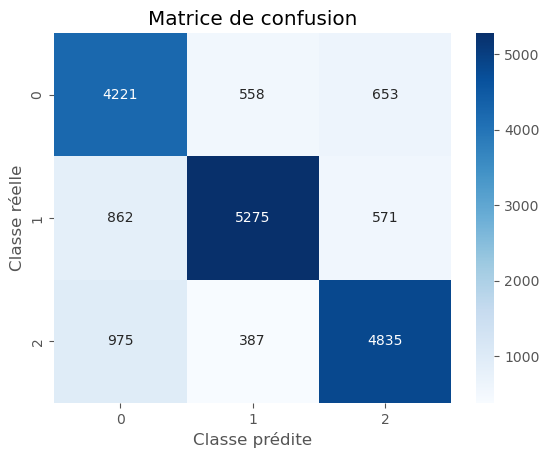

In [109]:
plot_confusion_matrix(model, X_test, Y_test)

In [110]:
import pandas as pd

data_test = pd.read_csv("data_validation.txt", sep='\t', error_bad_lines=False)

In [111]:
data_test

,ID,Tweet,Affect Dimension,IntensityClass
0,2017-En-30153,@liamch88 yeah! :) playing well,valence,0: neutral or mixed emotional state can be inf...
1,2017-En-40929,At least I don't have a guy trying to discoura...,valence,0: neutral or mixed emotional state can be inf...
2,2017-En-22012,UPLIFT: If you're still discouraged it means y...,valence,0: neutral or mixed emotional state can be inf...
3,2017-En-30837,"...at your age, the heyday in the blood is tam...",valence,0: neutral or mixed emotional state can be inf...
4,2017-En-30838,i was so embarrassed when she saw us i was lik...,valence,-2: moderately negative emotional state can be...
...,...,...,...,...
1176,2017-En-30999,@DumTeeDum don't think Ian knew of Pavel. He k...,valence,1: slightly positive emotional state can be in...
1177,2017-En-40498,i lost my wallet lol.... again....,valence,-2: moderately negative emotional state can be...
1178,2017-En-30436,"repentance, and trusting in Christ. It is lowl...",valence,1: slightly positive emotional state can be in...
1179,2017-En-30584,@FoRDaYS14 😳 chewing what? #smile #arcdental #...,valence,0: neutral or mixed emotional state can be inf...


In [112]:
data_test["IntensityClass"].head()

0    0: neutral or mixed emotional state can be inf...
1    0: neutral or mixed emotional state can be inf...
2    0: neutral or mixed emotional state can be inf...
3    0: neutral or mixed emotional state can be inf...
4    -2: moderately negative emotional state can be...
Name: IntensityClass, dtype: object

In [113]:
import nltk
import random
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ordi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ordi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ordi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Augmentation des données pour le transfert learning

In [114]:
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

def synonym_replacement(sentence, n=2):
    words = nltk.word_tokenize(sentence)
    augmented_sentences = []
    for _ in range(n):
        for i in range(len(words)):
            synonyms = get_synonyms(words[i])
            if synonyms:
                synonym = random.choice(synonyms)
                words[i] = synonym
                augmented_sentences.append(' '.join(words))
    return augmented_sentences

def random_insertion(sentence, n=2):
    words = nltk.word_tokenize(sentence)
    augmented_sentences = []
    word_list = list(wordnet.words())  
    for _ in range(n):
        new_sentence = words.copy()
        for _ in range(3):  
            new_word = random.choice(word_list) 
            random_index = random.randint(0, len(new_sentence) - 1)
            new_sentence.insert(random_index, new_word)
        augmented_sentences.append(' '.join(new_sentence))
    return augmented_sentences


def random_deletion(sentence, p=0.2):
    words = nltk.word_tokenize(sentence)
    augmented_sentences = []
    for word in words:
        if random.random() > p:
            augmented_sentences.append(' '.join(words))
        else:
            words.remove(word)
            augmented_sentences.append(' '.join(words))
    return augmented_sentences


In [115]:
def augment_data_by_class(data, class_column, text_column):
    augmented_data = pd.DataFrame(columns=[class_column, text_column])
    for class_label in data[class_column].unique():
        class_data = data[data[class_column] == class_label]
        synonym_replacements = class_data[text_column].apply(synonym_replacement)
        random_insertions = class_data[text_column].apply(random_insertion)
        random_deletions = class_data[text_column].apply(random_deletion)

        augmented_data = pd.concat([augmented_data, pd.DataFrame({class_column: [class_label]*len(synonym_replacements.explode()),
                                                                 text_column: synonym_replacements.explode()})])
        augmented_data = pd.concat([augmented_data, pd.DataFrame({class_column: [class_label]*len(random_insertions.explode()),
                                                                 text_column: random_insertions.explode()})])
        augmented_data = pd.concat([augmented_data, pd.DataFrame({class_column: [class_label]*len(random_deletions.explode()),
                                                                 text_column: random_deletions.explode()})])
    return augmented_data

augmented_data = augment_data_by_class(data_test, 'IntensityClass', 'Tweet')
augmented_data

,IntensityClass,Tweet
0,0: neutral or mixed emotional state can be inf...,@ liamch88 yea ! : ) playing well
0,0: neutral or mixed emotional state can be inf...,@ liamch88 yea ! : ) play well
0,0: neutral or mixed emotional state can be inf...,@ liamch88 yea ! : ) play well
0,0: neutral or mixed emotional state can be inf...,@ liamch88 yea ! : ) play well
0,0: neutral or mixed emotional state can be inf...,@ liamch88 yea ! : ) play well
...,...,...
1171,-1: slightly negative emotional state can be i...,DeltaDomain @ SawDraze @ qurions dis dat nigga...
1171,-1: slightly negative emotional state can be i...,DeltaDomain @ SawDraze @ qurions dis dat nigga...
1171,-1: slightly negative emotional state can be i...,DeltaDomain @ SawDraze @ qurions dis dat nigga...
1171,-1: slightly negative emotional state can be i...,DeltaDomain @ SawDraze @ qurions dis dat nigga...


In [116]:
augmented_data['Tweet'] = augmented_data['Tweet'].astype(str).str.lower()
augmented_data['Tweet'] = augmented_data['Tweet'].apply(preprocessing)
augmented_data['Tweet'] = augmented_data['Tweet'].apply(lambda text: cleaning_stopwords(text))
augmented_data['Tweet'].fillna('', inplace=True)

In [117]:
augmented_data['Tweet'] = augmented_data['Tweet'].str.lower()
augmented_data['Tweet'] = augmented_data['Tweet'].apply(lambda text: cleaning_stopwords(text))

In [118]:
augmented_data['Tweet'] = augmented_data['Tweet'].apply(preprocessing)

In [119]:
augmented_data['Tweet'].head()

0    liamch yea play well
0    liamch yea play well
0    liamch yea play well
0    liamch yea play well
0    liamch yea play well
Name: Tweet, dtype: object

In [120]:
augmented_data['Tweet'] = augmented_data['Tweet'].apply(tokenizer.tokenize)

In [121]:
augmented_data['Tweet'] = augmented_data['Tweet'].apply(lambda x:lemmatization(x))  

In [122]:
X1=augmented_data.Tweet
label_mapping = {
    '0: neutral or mixed emotional state can be inferred': 0,
    '-1: slightly negative emotional state can be inferred': -1,
    '-2: moderately negative emotional state can be inferred': -2,
    '-3: very negative emotional state can be inferred': -3,
    '1: slightly positive emotional state can be inferred': 1,
    '2: moderately positive emotional state can be inferred': 2,
    '3: very positive emotional state can be inferred': 3
}


Y1 = augmented_data["IntensityClass"].map(label_mapping)
Y1_shifted = Y1 + 3
Y1_encoded = to_categorical(Y1_shifted, num_classes=7)


In [123]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Tokenization
tok1 = Tokenizer(num_words=5000)
tok1.fit_on_texts(augmented_data["Tweet"])
sequences1 = tok1.texts_to_sequences(augmented_data["Tweet"])

# Padding sequences
sequences_matrix1 = pad_sequences(sequences1, maxlen=max_len)


In [135]:
# Affichage des premières séquences
print("Affichage des premières séquences :")
for i, sequence in enumerate(sequences1[:8]):
    print(f"Séquence {i + 1}: {sequence}")


Affichage des premières séquences :
Séquence 1: [1674, 563, 414, 135]
Séquence 2: [25, 235, 3, 39, 28, 4, 266, 236, 2, 487, 15, 415, 9, 45, 3, 84, 2, 51, 48, 38, 98, 985, 267, 986, 1675, 2, 1676]
Séquence 3: [1677, 33, 112, 116, 709, 12, 307, 112, 987, 2, 1, 988, 1678, 37, 197, 2, 1, 988, 989, 153, 2, 1, 352]
Séquence 4: [25, 18, 990, 1, 308, 9, 1, 1679, 6, 1680, 63, 1681, 1682, 991, 1683, 1684]
Séquence 5: [3, 29, 16, 992, 40, 65, 416, 144, 3, 29, 31, 1685, 65, 1686, 237, 1687, 34, 117, 65, 488, 1688, 26, 184, 1689, 144, 9, 710]
Séquence 6: [105, 993, 14, 417, 994, 21, 198, 117, 4, 489, 353, 268, 711, 1690, 353, 213, 269, 81, 23, 995, 45, 3, 118, 121, 1691]
Séquence 7: [3, 161, 185, 1692, 17, 85, 113, 712, 2, 713, 82, 996]
Séquence 8: [25, 1, 1693, 490, 7, 199, 997, 57, 238, 1694, 5, 2, 106, 1, 1695, 145, 714, 58, 49, 28, 75, 1696, 25]


In [136]:
print("Unique values in Y1:", augmented_data["IntensityClass"].unique())

Unique values in Y1: ['0: neutral or mixed emotional state can be inferred'
 '-2: moderately negative emotional state can be inferred'
 '-3: very negative emotional state can be inferred'
 '1: slightly positive emotional state can be inferred'
 '2: moderately positive emotional state can be inferred'
 '3: very positive emotional state can be inferred'
 '-1: slightly negative emotional state can be inferred']


In [138]:
# Couper Y1_encoded pour correspondre à sequences_matrix1
Y1_encoded = Y1_encoded[:len(sequences_matrix1)]

# Vous pouvez maintenant exécuter train_test_split sans erreur
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train_unencoded1, Y_test_unencoded1 = train_test_split(
    sequences_matrix1, Y1_encoded, test_size=0.3, random_state=42
)


In [139]:
Y1_encoded[:6]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [140]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense
from keras.optimizers import SGD

vocab_size = 5000
embedding_size = 32

# Rebuild the model with the desired layers
model2 = Sequential()

# Copier les couches de 'model1' à 'model2'
for layer in model.layers:
    model2.add(layer)

# Set previous layers to non-trainable
for layer in model2.layers:
    layer.trainable = False

# Supprimer la dernière couche 
model2.pop()

model2.add(Dense(128, activation='relu', trainable=True))  # Première couche Dense
model2.add(Dense(64, activation='relu', trainable=True))   # Deuxième couche Dense
model2.add(Dense(7, activation='softmax', trainable=True)) # Couche de sortie pour 7 classes

# Recompiler le modèle
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [141]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 500, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,744 (702.12 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 179,744 (702.12 KB)

In [143]:
X_train1.shape

(826, 500)

In [144]:
Y_train_unencoded1.shape

(826, 7)

In [142]:

batch_size = 64
history = model2.fit(X_train1, Y_train_unencoded1, validation_data=(X_test1, Y_test_unencoded1),
                     batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.7258 - loss: 1.4773 - val_accuracy: 1.0000 - val_loss: 0.6288
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 1.0000 - loss: 0.3835 - val_accuracy: 1.0000 - val_loss: 0.0682
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 

In [145]:
import pandas as pd

data_test2 = pd.read_csv("Test_gold.txt", sep='\t', error_bad_lines=False)

In [146]:
data_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1002 non-null   object
 1   Tweet             1002 non-null   object
 2   Affect Dimension  1002 non-null   object
 3   IntensityClass    1002 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [147]:
data_test2['Tweet'] = data_test2['Tweet'].str.lower()
data_test2['Tweet'] = data_test2['Tweet'].apply(preprocessing)
data_test2['Tweet'] = data_test2['Tweet'].apply(lambda text: cleaning_stopwords(text))

In [148]:
data_test2['Tweet'] = data_test2['Tweet'].apply(tokenizer.tokenize)

In [149]:
data_test2['Tweet'] = data_test2['Tweet'].apply(lambda x:lemmatization(x))  

In [150]:
X2=data_test2.Tweet
label_mapping = {
    '0: no anger can be inferred': 0,
    '-1: slightly negative emotional state can be inferred': -1,
    '-2: moderately negative emotional state can be inferred': -2,
    '-3: very negative emotional state can be inferred': -3,
    '1: low amount of anger can be inferred': 1,
    '2: moderate amount of anger can be inferred': 2,
    '3: high amount of anger can be inferred': 3
}


Y2 = data_test2["IntensityClass"].map(label_mapping)
Y2_shifted = Y2 + 3
Y2_encoded = to_categorical(Y2_shifted, num_classes=7)

In [151]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
max_len = 500

# Tokenization
tok2 = Tokenizer(num_words=5000)
tok2.fit_on_texts(data_test2["Tweet"])
sequences2 = tok2.texts_to_sequences(data_test2["Tweet"])

# Padding sequences
sequences_matrix2 = pad_sequences(sequences2, maxlen=max_len)

In [152]:
# Affichage des premières séquences
print("Affichage des premières séquences :")
for i, sequence in enumerate(sequences2[:8]):
    print(f"Séquence {i + 1}: {sequence}")


Affichage des premières séquences :
Séquence 1: [1210, 15, 186, 187, 16, 716]
Séquence 2: [34, 6, 77, 88, 55, 89, 64, 29, 390]
Séquence 3: [1211, 35, 504, 148, 35, 148, 1212]
Séquence 4: [307, 717, 122, 1213, 1214, 1215, 718, 308, 505, 30, 719, 149, 506]
Séquence 5: [507, 720, 150, 508, 1216, 509, 507, 15, 721, 186, 217]
Séquence 6: [1217, 722, 309, 50, 188, 88, 123, 510, 391, 310]
Séquence 7: [15, 1218, 1219, 723, 1220, 1221, 26, 1222, 31, 392, 26, 393, 38]
Séquence 8: [45, 3, 1223, 189]


In [153]:
print("Unique values in Y2:", data_test2["IntensityClass"].unique())

Unique values in Y2: ['2: moderate amount of anger can be inferred'
 '0: no anger can be inferred' '3: high amount of anger can be inferred'
 '1: low amount of anger can be inferred']


In [154]:
model2.save('model2.keras')

In [155]:
Y2_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [156]:
sequences_matrix2 

array([[   0,    0,    0, ...,  187,   16,  716],
       [   0,    0,    0, ...,   64,   29,  390],
       [   0,    0,    0, ...,   35,  148, 1212],
       ...,
       [   0,    0,    0, ...,  264,   16,   69],
       [   0,    0,    0, ...,    6,   87, 3816],
       [   0,    0,    0, ...,  708, 3817,   20]])

In [162]:
# Evaluation du modele 
loss, accuracy = model2.evaluate(sequences_matrix2,Y2_encoded)
print(f'Test Accuracy: {accuracy}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4854 - loss: 5.8480
Test Accuracy: 0.4640718698501587


In [ ]:
predictions = model2.predict(sequences_matrix2)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
labels = ['0: neutral or mixed', 
          '-2: moderately negative', 
          '-3: very negative', 
          '1: slightly positive', 
          '2: moderately positive', 
          '3: very positive', 
          '-1: slightly negative']

predicted_labels = [labels[i] for i in predicted_classes]

In [ ]:
import pandas as pd
data_test2['Intensity Class'] = predicted_labels
data_test2.to_csv('Result.csv', sep='\t', index=False, header=False)
